In [1]:
import torch
from matplotlib import pyplot as plt
%matplotlib inline

# Linear Regression

* In a regression task, we have access to a dataset composed of pairs of inputs and outputs. The goal is to find a model (possibly defined by parameters) that allows predicting the output associated to a new input.

* Predicting the price of rent, the length of a hospital stay, and the demand for a product are examples of regression tasks.

* *Linear regression* is one of the simplest regression models. It assumes that the observation $\mathbf{x}$ and the target $y$ are related linearly, so that $y$ can be computed as a weighted sum of the elements in $\mathbf{x}$.



# A Simple Example

* Consider the task of estimating the price of a house (in pounds) based on its area (in square feet) and age (in years).

* Linear regression would suppose that the target (price) can be expressed as a weighted sum of the features (elements of the observation, which are area and age) plus a constant:

$$\text{price} = w_{\text{area}} \cdot \text{area} + w_{\mathrm{age}} \cdot \mathrm{age} + b.$$

* In this context, $w_{\mathrm{area}}$ and $w_{\mathrm{age}}$
are called *weights*, and $b$ is called a *bias*.
    * The weights determine how each feature influences the prediction.
    * The bias is the prediction for when all features are zero.

* In order to find the weights and bias required to predict the price of a new house, we can use a *training* dataset composed of pairs of inputs and outputs. Each input would be a vector composed of the area and the age of a house, and each output would be the known sale price for that house.

* The goal is not to accurately predict known sales prices, but to generalize (make good predictions for new houses)

* In what follows, we let $(\mathbf{x}^{(1)}, y^{(1)}), (\mathbf{x}^{(2)}, y^{(2)}), \ldots, (\mathbf{x}^{(n)}, y^{(n)})$ denote a dataset with $n$ examples, where each observation $\mathbf{x}^{(i)}$ corresponds to the target $y^{(i)}$.

<!-- In the terminology of machine learning,
the dataset is called a *training dataset* or *training set*,
and each row (here the data corresponding to one sale)
is called an *example* (or *data point*, *data instance*, *sample*).
The thing we are trying to predict (price)
is called a *label* (or *target*).
The independent variables (age and area)
upon which the predictions are based
are called *features* (or *covariates*). -->



# Linear Model

* If the observations are composed of $d$ features, the prediction $\hat{y}$ computed by a linear model defined by the weights $\mathbf{w} = [w_1, w_2, \ldots, w_d]^T$ and the bias $b$ for an observation $\mathbf{x} = [x_1, x_2, \ldots, x_d]^T$ would be

$$\hat{y} = w_1  x_1 + \cdots + w_d  x_d + b.$$

* Using the dot product, we can rewrite the previous equation as

$$\hat{y} = \mathbf{w}^T \mathbf{x} + b.$$

* A design matrix $\mathbf{X} \in \mathbb{R}^{n \times d}$ contains one row for each observation and one column for each feature, so that
$$ \mathbf{X}=
\begin{bmatrix}
{\mathbf{x}^{(1)}}^T \\
{\mathbf{x}^{(2)}}^T \\
\vdots \\
{\mathbf{x}^{(n)}}^T \\
\end{bmatrix} =
\begin{bmatrix}
x_1^{(1)} & x_2^{(1)} & \ldots & x_d^{(1)} \\
x_1^{(2)} & x_2^{(2)} & \ldots & x_d^{(2)} \\
\vdots & \vdots & \ddots \\
x_1^{(n)} & x_2^{(n)} & \ldots & x_d^{(n)}
\end{bmatrix}.$$

* A target vector $\mathbf{y}$ is composed of one element for each target, so that $\mathbf{y} = [y^{(1)}, y^{(2)}, \ldots, y^{(n)}]$.

* Using this notation, we may compute a prediction vector $\mathbf{\hat{y}}$ given by

$$ \mathbf{\hat{y}} = \mathbf{X} \mathbf{w} + b,$$

where the constant $b$ is added elementwise to the vector $\mathbf{X}\mathbf{w}$ (which results from a matrix-vector multiplication).

* Together, the weights $\mathbf{w}$ and bias $b$ define a *model*.

* Given a training dataset defined by a design matrix $\mathbf{X}$ and a target vector $\mathbf{y}$, our goal is to find a model (weights $\mathbf{w}$ and bias $b$) that makes good predictions for new observations.

* In this particular example, it is appropriate to look for a model that performs as well as possible in the training dataset.

* We need to define what it means to perform well on the training dataset.

* We also need a procedure to find the best model.


# Loss Function

* A *loss function* measures the disparity between *actual* and *predicted* targets for a given model.
* A loss function for a given model is zero if and only if the model makes perfect predictions in the training dataset.
* A model is considered better than another model if its loss is smaller.

* For a regression task, we may define the (halved squared error) loss function $l^{(i)}$ for the $i$-the example as

$$l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2,$$
where $\hat{y}^{(i)}$ is the prediction for the $i$-th observation and $y^{(i)}$ is the target for the $i$-th observation.

* Note that the model (weights $\mathbf{w}$ and bias $b$) affects the loss for the $i$-th example through the prediction $\hat{y}^{(i)}$

* When $d = 1$, the linear model corresponds to the line defined by the equation $\hat{y} = w_1 x + b$, so that the difference between actual and predicted targets can be visualized as follows:

![Fit data with a linear model.](https://drive.google.com/uc?export=view&id=1D39zWRCAFgZttNLrat6WXT3TYwiwx_eL)

* Large differences between $\hat{y}^{(i)}$ and $y^{(i)}$ lead to a large loss for the $i$-th observation.



# Loss Function


* In order to measure the performance of a model on a dataset composed of $n$ examples, we may average the individual loss functions to obtain a loss function $L$ given by:

$$L(\mathbf{w}, b) =\frac{1}{n}\sum_{i=1}^n l^{(i)}(\mathbf{w}, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^T \mathbf{x}^{(i)} + b - y^{(i)}\right)^2,$$

where we used the fact that the prediction $\hat{y}^{(i)}$ is given by $\hat{y}^{(i)} = \mathbf{w}^T \mathbf{x}^{(i)} + b$.

* *Training* is the process of solving the following optimization problem: find parameters ($\mathbf{w}^*, b^*$) such that

$$L(\mathbf{w}^*, b^*) = \min_{\mathbf{w}, b}\  L(\mathbf{w}, b).$$




# Analytic Solution

* It is possible to solve the optimization problem stated above analytically (that is, there is a formula to compute $\mathbf{w}^*$ and $b^*$).

* First, consider an extended design matrix $\mathbf{X}$ where we include an additional column filled with ones, so that
$$ \mathbf{X} =
\begin{bmatrix}
1 & x_1^{(1)} & x_2^{(1)} & \ldots & x_d^{(1)} \\
1 & x_1^{(2)} & x_2^{(2)} & \ldots & x_d^{(2)} \\
\vdots & \vdots & \vdots & \ddots \\
1 & x_1^{(n)} & x_2^{(n)} & \ldots & x_d^{(n)}
\end{bmatrix}.$$

* If we let $\mathbf{w} = [ w_0, w_1, w_2, \ldots, w_d]^T$ denote the corresponding extended weights, note that there is no longer need for a bias term $b$, since $w_0$ acts as a bias as long as the prediction $\hat{y}^{(i)}$ for the $i$-th observation is redefined as $$\hat{y}^{(i)} = w_0 + w_1 x_1^{(i)} + \cdots + w_d x_d^{(i)}.$$

* With these new definitions, we only need to find weights $\mathbf{w} = [ w_0, w_1, w_2, \ldots, w_d]^T$ that perform as well as possible in the training dataset.

* If $\| \cdot \|$ denotes the $L_2$-norm, we may redefine the corresponding loss function $L$ as

$$ L(\mathbf{w}) = \frac{1}{2n} || \mathbf{y} - \mathbf{X}\mathbf{w} ||^2. $$

* In other words, $L(\mathbf{w})$ is the squared Euclidean distance between the target vector and the prediction vector divided by $2n$.

* By computing the gradient of the loss function $L$ and setting it to zero, we find that if $\mathbf{w}^*$ exists then it must be equal to

$$\mathbf{w}^* = (\mathbf X^T \mathbf X)^{-1}\mathbf X^T \mathbf{y}.$$

* Computing $\mathbf{w}^*$ only requires being able to invert and multiply matrices. The matrix $\mathbf X^T \mathbf X$ is invertible whenever the columns in $\mathbf{X}$ are linearly independent.

* When we use neural networks for regression, we will not be able to solve the corresponding optimization problem analytically, which is why we need optimization methods such as gradient descent.

# Gradient Descent

* Consider a differentiable loss function $L : \mathbb{R}^d \to \mathbb{R}$. The gradient $\nabla L(\mathbf{w})$ has the following intuitive interpretation:
    * $\nabla L(\mathbf{w})$ gives the direction in which a *very small* change in $\mathbf{w}$ would **increase** $L(\mathbf{w})$ the most.
    * $- \nabla L(\mathbf{w})$ gives the direction in which a *very small* change in $\mathbf{w}$ would **decrease** $L(\mathbf{w})$ the most.

* The following code illustrates this interpretation of $- \nabla L(\mathbf{w})$. You do not need to understand the code, just observe the results.

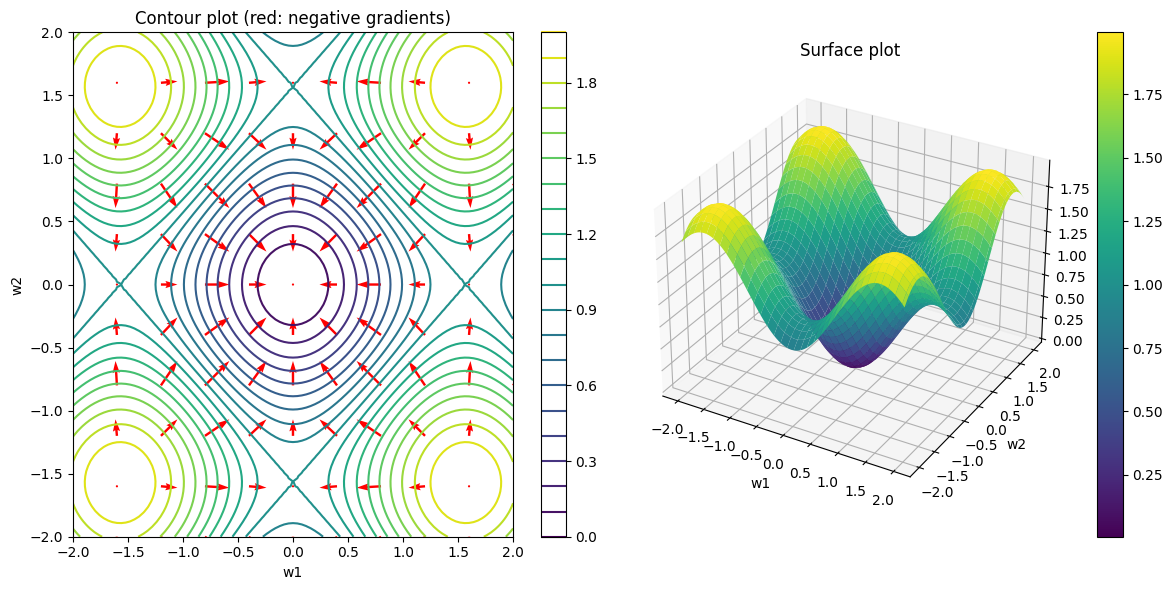

In [ ]:
# You do not need to understand the code, just observe the results.
import numpy as np
import matplotlib.pyplot as plt

# A simple "loss function" `l`
def l(w1, w2):
    return np.sin(w1)**2 + np.sin(w2)**2

# Partial derivative of `l` with respect to `w1`
def dldw1(w1, w2):
    return 2 * np.sin(w1) * np.cos(w1)

# Partial derivative of `l` with respect to `w2`
def dldw2(w1, w2):
    return 2 * np.sin(w2) * np.cos(w2)

w1s = np.linspace(-2, 2, 101)
w2s = np.linspace(-2, 2, 101)

W1, W2 = np.meshgrid(w1s, w2s)

L = l(W1, W2)
dLdW1 = dldw1(W1, W2)
dLdW2 = dldw2(W1, W2)

plt.figure(figsize=(12, 6))

# Contour plot
plt.subplot(1, 2, 1)
contour = plt.contour(W1, W2, L, 20, cmap='viridis')
k = 10
plt.quiver(W1[::k, ::k], W2[::k, ::k], -dLdW1[::k, ::k], -dLdW2[::k, ::k], color='red')
plt.colorbar(contour)
plt.title('Contour plot (red: negative gradients)')
plt.xlabel('w1')
plt.ylabel('w2')

# Surface plot
ax = plt.subplot(1, 2, 2, projection='3d')
surface = ax.plot_surface(W1, W2, L, cmap='viridis')
plt.colorbar(surface)
ax.set_title('Surface plot')
ax.set_xlabel('w1')
ax.set_ylabel('w2')

plt.tight_layout()
plt.show()

* Gradient descent is a minimization technique that exploits this property by starting at arbitrary weights $\mathbf{w}$ and updating them using $\mathbf{w} \gets \mathbf{w} - \eta \nabla L(\mathbf{w})$, where $\eta > 0$ is a small constant called **learning rate**.

* Gradient descent can try to minimize any loss function $L$ as long as the gradient $\nabla L(\mathbf{w})$ can be computed for any given $\mathbf{w}$.



# Minibatch Stochastic Gradient Descent

* Let $(\mathbf{x}^{(1)}, y^{(1)}), (\mathbf{x}^{(2)}, y^{(2)}), \ldots, (\mathbf{x}^{(n)}, y^{(n)})$ denote a dataset with $n$ examples, where each observation $\mathbf{x}^{(i)}$ corresponds to the target $y^{(i)}$.

* Let $l^{(i)}$ denote the loss function for the $i$-th example, so that the loss function $L$ is given by

$$ L(\mathbf{w}) = \frac{1}{n}\sum_{i = 1}^n l^{(i)}(\mathbf{w}). $$

* The gradient $\nabla L$ of the loss function $L$ is given by

$$ \nabla L(\mathbf{w}) = \frac{1}{n}\sum_{i=1}^n \nabla l^{(i)}(\mathbf{w}). $$

* If the dataset has many examples (if $n$ is large), computing $\nabla L(\mathbf{w})$ can be expensive.

* Minibatch stochastic gradient descent approximates $\nabla L$ using a random subset of examples in the dataset:
    0. Initialize the weights $\mathbf{w}$ arbitrarily.
    1. Sample a random set of indices $\mathcal{B}$ (minibatch), each between $1$ and $n$.
    2. Compute the gradient of the loss function for the $i$-th example $\nabla l^{(i)}(\mathbf{w})$ , for each $i \in \mathcal{B}$.
    3. Compute the average of these gradients to obtain an approximation of $\nabla L(\mathbf{w})$.
    4. Multiply the resulting vector by a small positive constant (learning rate) and then subtract it from the current weights $\mathbf{w}$ to obtain new weights $\mathbf{w}$:

    $$ \mathbf{w} \gets \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \nabla l^{(i)}(\mathbf{w}) .$$

    5. Return to Step 1.


# Minibatch Stochastic Gradient Descent for Linear Regression

* In linear regression, the gradient of the loss function for the $i$-the example $\nabla l^{(i)}(\mathbf{w})$ is given by
$$\nabla l^{(i)}(\mathbf{w}) = \nabla \left[ \frac{1}{2}\left(\mathbf{w}^T \mathbf{x}^{(i)} - y^{(i)}\right)^2 \right] = (\mathbf{w}^T \mathbf{x}^{(i)} - y^{(i)}) \mathbf{x}^{(i)}. $$

* Therefore, the minibatch stochastic gradient descent update is given by
$$ \mathbf{w} \gets \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} (\mathbf{w}^T \mathbf{x}^{(i)} - y^{(i)}) \mathbf{x}^{(i)}.$$

# Hyperparameters
    
* The weights of a linear model are considered *parameters*.

* In minibatch stochastic gradient descent, the batch size and the learning rate need to be fixed before training a model. This makes them *hyperparameters*.

* Hyperparameter tuning is the process of choosing hyperparameters based on their performance on a *validation set*.

    * A training set is used to train a model for a specific set of hyperparameters.

    * A validation dataset is used to compare the performance of different models, each of which comes from a different set of hyperparameters.

* The number of updates performed by minibatch stochastic gradient descent is also a hyperparameter.

* After this number is reached (or until some other stopping criterion is met), we need to record the weights $\hat{\mathbf{w}}$ of the final model.

* The final weights $\hat{\mathbf{w}}$ will typically not minimize the loss function $L$, because minibatch stochastic gradient descent is not guaranteed to converge to a (local/global) minimum in a finite number of steps.


# Predicting using the Learned Model

* Given the final weights $\hat{\mathbf{w}} = [\hat{w}_0, \hat{w}_1, \ldots, \hat{w}_d]^T$, we can compute a prediction $\hat{y}$ for a new observation $\mathbf{x}$ as $\hat{y} = \hat{\mathbf{w}}^T \mathbf{x}$.

* If an observation $\mathbf{x} = [1, \text{area}, \text{age}]^T$ represents the features of a house, our prediction $\hat{y}$ would be given by
$$\hat{y}  = \hat{w}_0 +  \hat{w}_{1} \cdot \text{area} + \hat{w}_{2} \cdot \mathrm{age}. $$

* While the process of minimizing a loss function for a given dataset is called **training**, the process of computing predictions for new observations is called **inference**.





# From Linear Regression to Neural Networks

* We can think of a linear model as a very simple neural network:

![Linear regression is a single-layer neural network.](https://drive.google.com/uc?export=view&id=1PxKbmwrVqqkmrZRT8l9DywByb-vHLZD7)


* An observation $\mathbf{x} = [x_1, \ldots, x_d]^T$ is the input layer, which has $d$ dimensions.

* Each element of the input layer is connected to the output layer through a weighted connection: the $k$-th arrow has a corresponding weight $w_k$.

* The output $o_1$ is given by $o_1 = \sum_{k = 1}^d w_k x_k$, which corresponds to weighing each of its inputs and then adding the results.

* The *number of layers* in the neural network above is $1$.

# Recommended reading

* [Dive into Deep Learning](https://d2l.ai): Chapters 3.1, 3.2, and 3.3.

# [Storing this notebook as a `pdf`]

* In order to store this notebook as a pdf, you will need to hide the images included in the previous cells using the following syntax:
    * `<!--- ![Image caption.](https://link.to.image) --->`


In [ ]:
%%capture
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

# Set the path to this notebook below (add \ before spaces). The output `pdf` will be stored in the corresponding folder.
!jupyter nbconvert --to pdf /content/gdrive/My\ Drive/Colab\ Notebooks/nndl/week_03/lecture/01_Linear_Regression.ipynb

# If having issues, save this notebook (File > Save) and restart the session (Runtime > Restart session) before running this cell. To debug, remove the first line (`%%capture`).

Mounted at /content/gdrive
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-plain-generic is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
[NbConvertApp] Converting notebook /content/gdrive/My Drive/Colab Notebooks/nndl/week_03/lecture/01_Linear_Regression.ipynb to pdf
[NbConvertApp] Support files will be in 01_Linear_Regression_files/
[NbConvertApp] Making directory ./01_Linear_Regression_files
[NbConvertApp] Writing 43030 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully cre